In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finaldataset/Dataset/training/Humanitarian Aid and rehabilitation/14.jpeg
/kaggle/input/finaldataset/Dataset/training/Humanitarian Aid and rehabilitation/55.jpeg
/kaggle/input/finaldataset/Dataset/training/Humanitarian Aid and rehabilitation/18.jpeg
/kaggle/input/finaldataset/Dataset/training/Humanitarian Aid and rehabilitation/56.jpeg
/kaggle/input/finaldataset/Dataset/training/Humanitarian Aid and rehabilitation/16.jpeg
/kaggle/input/finaldataset/Dataset/training/Humanitarian Aid and rehabilitation/44.jpeg
/kaggle/input/finaldataset/Dataset/training/Humanitarian Aid and rehabilitation/31.jpeg
/kaggle/input/finaldataset/Dataset/training/Humanitarian Aid and rehabilitation/25.jpeg
/kaggle/input/finaldataset/Dataset/training/Humanitarian Aid and rehabilitation/43.jpeg
/kaggle/input/finaldataset/Dataset/training/Humanitarian Aid and rehabilitation/67.jpeg
/kaggle/input/finaldataset/Dataset/training/Humanitarian Aid and rehabilitation/27.jpeg
/kaggle/input/finaldataset/Datas

In [2]:
# Example: Create new folders in your Kaggle working directory
!mkdir -p /kaggle/working/finaldataset/Dataset/resized_training
!mkdir -p /kaggle/working/finaldataset/Dataset/resized_validation
!mkdir -p /kaggle/working/finaldataset/Dataset/resized_test


In [3]:
from PIL import Image
import os

target_width = 71  # Replace with your extracted image width
target_height = 74  # Replace with your extracted image height

def resize_images(input_folder, output_folder):
    # Walk through all subdirectories
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            # Check if file is an image (add other extensions if needed)
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                input_path = os.path.join(root, file)
                
                # Create output subdirectory structure
                relative_path = os.path.relpath(root, input_folder)
                output_subdir = os.path.join(output_folder, relative_path)
                os.makedirs(output_subdir, exist_ok=True)
                
                # Resize and save
                try:
                    img = Image.open(input_path)
                    resized_img = img.resize((target_width, target_height), Image.Resampling.LANCZOS)
                    resized_img.save(os.path.join(output_subdir, file), dpi=(96, 96))
                except Exception as e:
                    print(f"Skipped {input_path} due to error: {e}")

# Resize training, validation, and test sets
resize_images("/kaggle/input/finaldataset/Dataset/training", "/kaggle/working/finaldataset/Dataset/resized_training")
resize_images("/kaggle/input/finaldataset/Dataset/val", "/kaggle/working/finaldataset/Dataset/resized_validation")
resize_images("/kaggle/input/finaldataset/Dataset/test", "/kaggle/working/finaldataset/Dataset/resized_test")

In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
from pathlib import Path  # Import Path from pathlib

image_dir = Path("/kaggle/working/finaldataset/Dataset")  # Define the image directory

In [6]:
image_dir

PosixPath('/kaggle/working/finaldataset/Dataset')

In [7]:
file_paths = list(image_dir.glob(r'**/*.*'))  # Match all files
file_paths = [fp for fp in file_paths if fp.suffix.lower() in ['.jpg', '.jpeg', '.png']]

#labels are assumed to be folder name so here we r extracting them
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1],file_paths))

#Converting filepaths list into pandas Series with column name as Filepath
file_paths = pd.Series(file_paths,name = 'Filepath').astype(str)

#converting labels into panda series
labels = pd.Series(labels,name='Label')

#combine both labels and filepaths pandas series into a single dataframe named images
images = pd.concat([file_paths,labels],axis=1)

In [8]:
absolute_file_paths = [os.path.abspath(fp) for fp in file_paths]

In [9]:
print(images.Label.value_counts())

Label
Military vehicles and weapons          80
DestroyedBuildings                     80
Humanitarian Aid and rehabilitation    80
Combat                                 80
Fire                                   80
resized_test                           11
Name: count, dtype: int64


In [10]:
images.Label.value_counts()

Label
Military vehicles and weapons          80
DestroyedBuildings                     80
Humanitarian Aid and rehabilitation    80
Combat                                 80
Fire                                   80
resized_test                           11
Name: count, dtype: int64

In [11]:
print(len(file_paths))  # Should return the total number of images
print(file_paths[:5])

411
0    /kaggle/working/finaldataset/Dataset/resized_t...
1    /kaggle/working/finaldataset/Dataset/resized_t...
2    /kaggle/working/finaldataset/Dataset/resized_t...
3    /kaggle/working/finaldataset/Dataset/resized_t...
4    /kaggle/working/finaldataset/Dataset/resized_t...
Name: Filepath, dtype: object


In [12]:
images


,Filepath,Label
0,/kaggle/working/finaldataset/Dataset/resized_t...,resized_test
1,/kaggle/working/finaldataset/Dataset/resized_t...,resized_test
2,/kaggle/working/finaldataset/Dataset/resized_t...,resized_test
3,/kaggle/working/finaldataset/Dataset/resized_t...,resized_test
4,/kaggle/working/finaldataset/Dataset/resized_t...,resized_test
...,...,...
406,/kaggle/working/finaldataset/Dataset/resized_t...,Fire
407,/kaggle/working/finaldataset/Dataset/resized_t...,Fire
408,/kaggle/working/finaldataset/Dataset/resized_t...,Fire
409,/kaggle/working/finaldataset/Dataset/resized_t...,Fire


In [13]:
train_df = images[images['Label'] != 'resized_test']
test_df = images[images['Label'] == 'resized_test']

#test_df = images[images['Label'] == 'test']

In [14]:
test_df


,Filepath,Label
0,/kaggle/working/finaldataset/Dataset/resized_t...,resized_test
1,/kaggle/working/finaldataset/Dataset/resized_t...,resized_test
2,/kaggle/working/finaldataset/Dataset/resized_t...,resized_test
3,/kaggle/working/finaldataset/Dataset/resized_t...,resized_test
4,/kaggle/working/finaldataset/Dataset/resized_t...,resized_test
5,/kaggle/working/finaldataset/Dataset/resized_t...,resized_test
6,/kaggle/working/finaldataset/Dataset/resized_t...,resized_test
7,/kaggle/working/finaldataset/Dataset/resized_t...,resized_test
8,/kaggle/working/finaldataset/Dataset/resized_t...,resized_test
9,/kaggle/working/finaldataset/Dataset/resized_t...,resized_test


In [15]:
print(test_df.Label.value_counts())


Label
resized_test    11
Name: count, dtype: int64


In [16]:
import re
# Function to extract filename without numbers and extension
def clean_label(filepath):
    filename = os.path.basename(filepath)  # Extract filename
    name, _ = os.path.splitext(filename)  # Remove extension
    name = re.sub(r'\d+', '', name)  # Remove numbers
    return name

# Apply function to update labels for all images
test_df.loc[:, "Label"] = test_df["Filepath"].apply(clean_label)

In [17]:
test_df


,Filepath,Label
0,/kaggle/working/finaldataset/Dataset/resized_t...,sample
1,/kaggle/working/finaldataset/Dataset/resized_t...,rehab
2,/kaggle/working/finaldataset/Dataset/resized_t...,rehab
3,/kaggle/working/finaldataset/Dataset/resized_t...,building
4,/kaggle/working/finaldataset/Dataset/resized_t...,combat
5,/kaggle/working/finaldataset/Dataset/resized_t...,combat
6,/kaggle/working/finaldataset/Dataset/resized_t...,building
7,/kaggle/working/finaldataset/Dataset/resized_t...,fire
8,/kaggle/working/finaldataset/Dataset/resized_t...,fire
9,/kaggle/working/finaldataset/Dataset/resized_t...,military


In [18]:
# Mapping old labels to new classes
label_mapping = {
    "fire": "Fire",
    "rehab": "Humanitarian Aid and rehabilitation",
    "combat": "Combat",
    "military": "Military vehicles and weapons",
    "building": "DestroyedBuildings"
}

test_df.loc[:, "Label"] = test_df["Label"].map(label_mapping).fillna(test_df["Label"])

In [19]:
test_df=test_df[test_df["Label"]!='sample']

In [20]:
test_df


,Filepath,Label
1,/kaggle/working/finaldataset/Dataset/resized_t...,Humanitarian Aid and rehabilitation
2,/kaggle/working/finaldataset/Dataset/resized_t...,Humanitarian Aid and rehabilitation
3,/kaggle/working/finaldataset/Dataset/resized_t...,DestroyedBuildings
4,/kaggle/working/finaldataset/Dataset/resized_t...,Combat
5,/kaggle/working/finaldataset/Dataset/resized_t...,Combat
6,/kaggle/working/finaldataset/Dataset/resized_t...,DestroyedBuildings
7,/kaggle/working/finaldataset/Dataset/resized_t...,Fire
8,/kaggle/working/finaldataset/Dataset/resized_t...,Fire
9,/kaggle/working/finaldataset/Dataset/resized_t...,Military vehicles and weapons
10,/kaggle/working/finaldataset/Dataset/resized_t...,Military vehicles and weapons


In [21]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.2)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

In [22]:
train_images = train_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed = 42,
    subset = 'training',
)
val_images = train_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 320 validated image filenames belonging to 5 classes.
Found 80 validated image filenames belonging to 5 classes.
Found 10 validated image filenames belonging to 5 classes.


In [23]:
print(train_df['Label'].value_counts())
print(test_df['Label'].value_counts())

Label
Military vehicles and weapons          80
DestroyedBuildings                     80
Combat                                 80
Humanitarian Aid and rehabilitation    80
Fire                                   80
Name: count, dtype: int64
Label
Humanitarian Aid and rehabilitation    2
DestroyedBuildings                     2
Combat                                 2
Fire                                   2
Military vehicles and weapons          2
Name: count, dtype: int64


In [24]:
pretrained_model = tf.keras.applications.resnet50.ResNet50(
    input_shape = (224,224,3),
    include_top = False,
    weights = 'imagenet',
    pooling = 'avg')
pretrained_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128,activation = 'relu' )(pretrained_model.output)
x = tf.keras.layers.Dense(50,activation = 'relu')(x)
outputs = tf.keras.layers.Dense(5,activation='softmax')(x)
model = tf.keras.Model(inputs,outputs)
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,856,689 (91.01 MB)

 Trainable params: 268,977 (1.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

None


In [26]:
from tensorflow.keras.utils import Sequence

class CustomDataset(Sequence):  # Inherit from Sequence
    def __init__(self, data, labels, batch_size, **kwargs):
        super().__init__(**kwargs)  # Add this line to fix the warning
        self.data = data
        self.labels = labels
        self.batch_size = batch_size

    def __len__(self):
        return len(self.data) // self.batch_size

    def __getitem__(self, index):
        batch_data = self.data[index * self.batch_size:(index + 1) * self.batch_size]
        batch_labels = self.labels[index * self.batch_size:(index + 1) * self.batch_size]
        return batch_data, batch_labels

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    x=train_images, 
    validation_data=val_images, 
    epochs=25,
    callbacks=[callbacks]
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 854ms/step - accuracy: 0.4098 - loss: 1.4728 - val_accuracy: 0.6375 - val_loss: 0.9658
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.7927 - loss: 0.5297 - val_accuracy: 0.8125 - val_loss: 0.4625
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9147 - loss: 0.2939 - val_accuracy: 0.7875 - val_loss: 0.5287
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.9631 - loss: 0.1467 - val_accuracy: 0.8750 - val_loss: 0.4321
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.9756 - loss: 0.0935 - val_accuracy: 0.8250 - val_loss: 0.5515
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.9872 - loss: 0.0581 - val_accuracy: 0.8125 - val_loss: 0.4480
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9991 - loss: 0.0411 - val_accuracy: 0.8250 - val_loss: 0.5182
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 1.0000 - loss: 0.0276 - val_accuracy: 0.8500 - val

In [28]:
results = model.evaluate(test_images,verbose=0)
print(results)
print(f"Test Accuracy : {np.round(results[1] *100,2)}% ")

[0.07236530631780624, 1.0]
Test Accuracy : 100.0% 


In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Convert labels to a NumPy array
labels_array = np.array(test_images.labels)

# Ensure labels are integers (important for class extraction)
labels_array = labels_array.astype(int)

# Generate predictions
predictions = np.argmax(model.predict(test_images), axis=1)

# Get unique classes **from labels and predictions** to ensure alignment
unique_classes = np.unique(np.concatenate((labels_array, predictions)))

# Ensure `target_names` has the same length as `unique_classes`
class_names = [f"Class {i}" for i in unique_classes]

# Generate confusion matrix and classification report
matrix = confusion_matrix(labels_array, predictions)
report = classification_report(
    labels_array,
    predictions,
    target_names=class_names,  # Now it should match the number of classes
    zero_division=0
)
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00         2
     Class 1       1.00      1.00      1.00         2
     Class 2       1.00      1.00      1.00         2
     Class 3       1.00      1.00      1.00         2
     Class 4       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



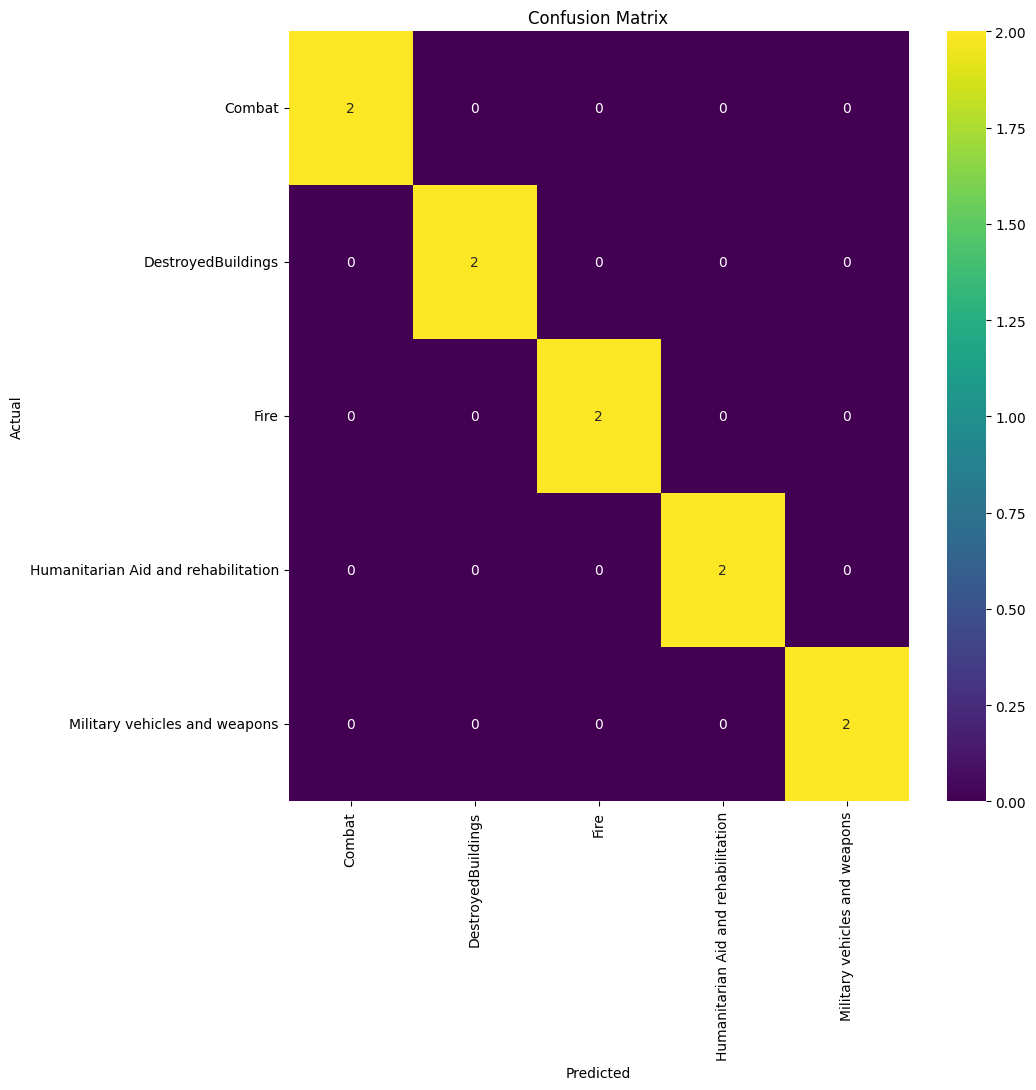

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,10))  # 30x30 is too large, adjusted to 10x10 for better visibility

sns.heatmap(matrix, annot=True, cmap='viridis', fmt='d')

# Extract class names from dictionary
class_names = list(test_images.class_indices.keys())

# Set correct tick labels and positions
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

# Save the figure correctly
fig.savefig("Confusion_Matrix.png", dpi=700)

In [31]:
print("Classification Report:\n",report)

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00         2
     Class 1       1.00      1.00      1.00         2
     Class 2       1.00      1.00      1.00         2
     Class 3       1.00      1.00      1.00         2
     Class 4       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [32]:
data_his = pd.DataFrame(history.history)
data_his

,accuracy,loss,val_accuracy,val_loss
0,0.556250,1.156689,0.6375,0.965757
1,0.834375,0.445256,0.8125,0.462514
2,0.921875,0.251292,0.7875,0.528653
3,0.962500,0.142353,0.8750,0.432134
4,0.978125,0.084582,0.8250,0.551519
5,0.990625,0.053197,0.8125,0.447999
6,0.996875,0.037731,0.8250,0.518158
7,1.000000,0.025648,0.8500,0.455815
8,1.000000,0.017756,0.8375,0.503969


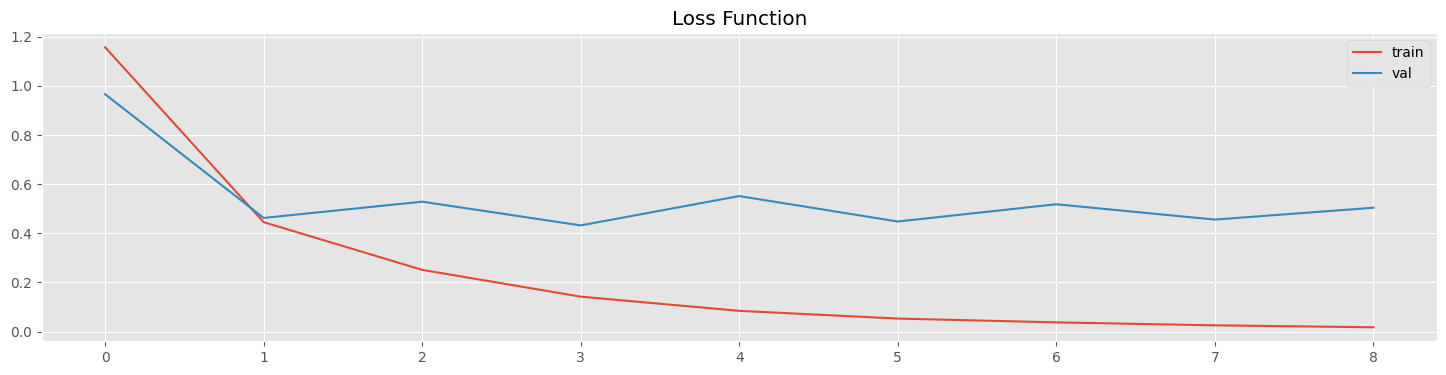

In [33]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['loss'], label = 'train')
plt.plot(data_his['val_loss'], label = 'val')
plt.legend()
plt.title('Loss Function')
plt.show()
fig.savefig("Loss Function",dpi=700)

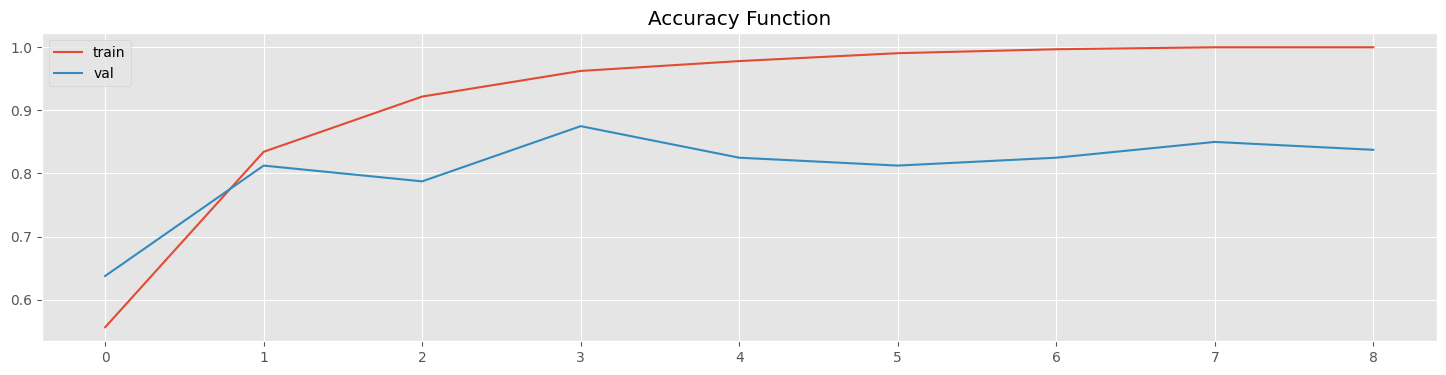

In [34]:
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['accuracy'], label = 'train')
plt.plot(data_his['val_accuracy'], label = 'val')
plt.legend()
plt.title('Accuracy Function')
plt.show()
fig.savefig("Accuracy Function",dpi=700)

In [35]:
train_images.class_indices.keys()


dict_keys(['Combat', 'DestroyedBuildings', 'Fire', 'Humanitarian Aid and rehabilitation', 'Military vehicles and weapons'])

In [36]:
df = pd.DataFrame({'names':list(train_images.class_indices.keys()),
                  'index':list(train_images.class_indices.values())})

In [37]:
df.iloc[0]['names']


'Combat'

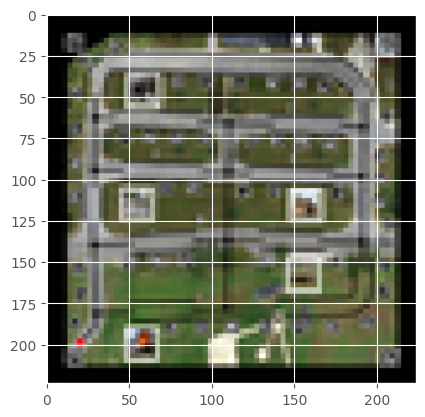

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1    DestroyedBuildings
Name: names, dtype: object


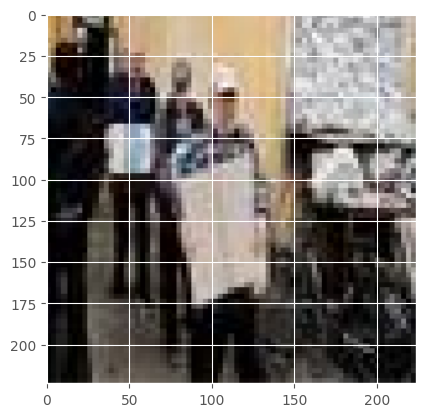

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3    Humanitarian Aid and rehabilitation
Name: names, dtype: object


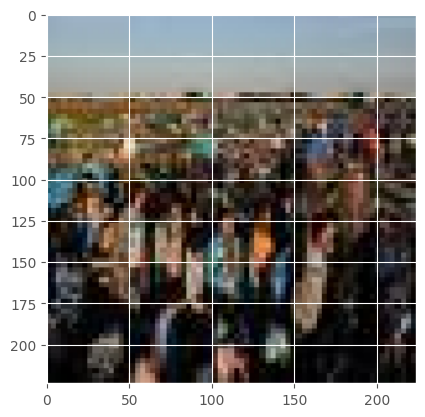

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3    Humanitarian Aid and rehabilitation
Name: names, dtype: object


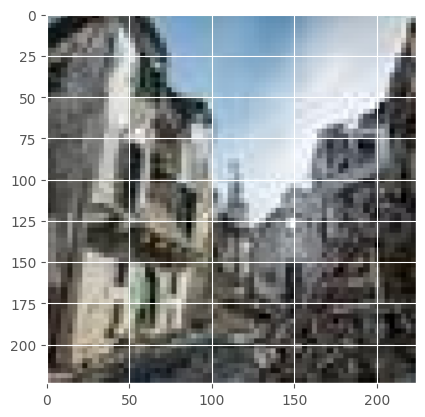

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1    DestroyedBuildings
Name: names, dtype: object


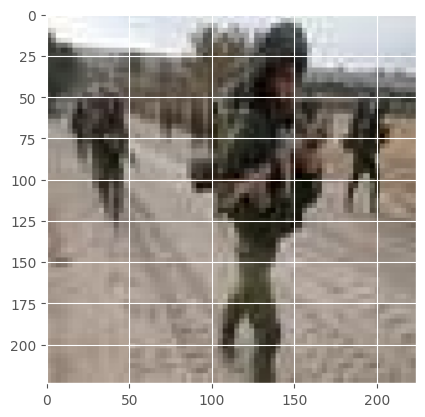

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0    Combat
Name: names, dtype: object


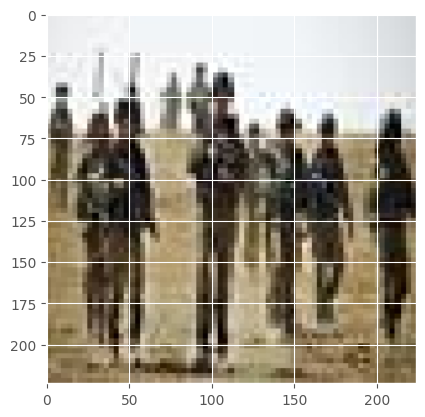

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3    Humanitarian Aid and rehabilitation
Name: names, dtype: object


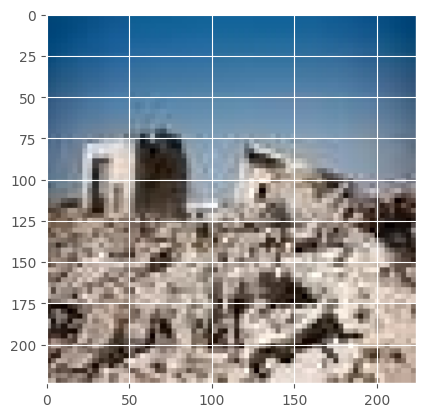

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1    DestroyedBuildings
Name: names, dtype: object


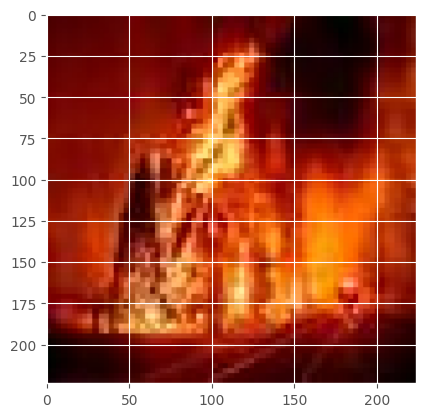

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2    Fire
Name: names, dtype: object


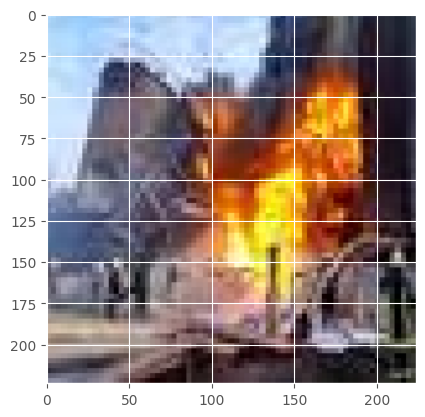

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2    Fire
Name: names, dtype: object


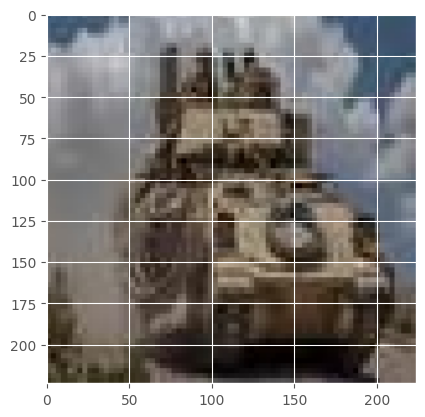

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0    Combat
Name: names, dtype: object


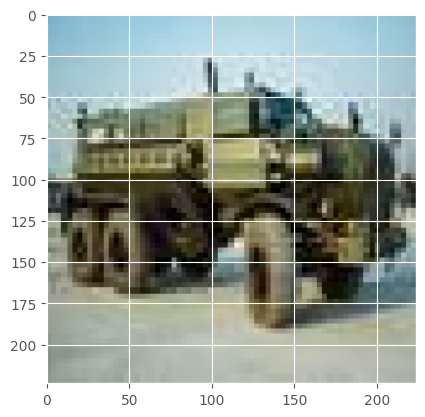

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4    Military vehicles and weapons
Name: names, dtype: object


In [38]:
from tensorflow.keras.preprocessing import image
dir_path = '/kaggle/working/finaldataset/Dataset/resized_test'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'/'+i,target_size = (224,224))
    plt.imshow(img)
    plt.show()

    X=image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    predictions = np.argmax(model.predict(images),axis=1)
    print(df.iloc[predictions]['names'])

In [39]:
model.save("Finalmodel.h5")